In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.corpora import Dictionary
from topic_modelling_function import extract_documents_csv, pre_processing, find_bigrams, training

## Topic modelling
Utilizzando la libreria GenSim bisognava scegliere un corpus con almeno 1k documenti e testare un algoritmo per il **topic modelling**.

Si è usato un corpus contente articoli sullo spazio ed è stato estratto con il metodo sottostante.

In [2]:
docs = extract_documents_csv()
len(docs)

18354

### Preprocessing
In questa fase il documento viene tokenizzato e lemmatizzato, vengono inoltre rimossi i numeri e convertite le parole in forma minuscola. Dopo di che si vanno ad aggiungere ai dati i bigrammi, in modo da catturare le parole composte nel testo.
Alla fine si va a rimuovere le parole più rare e le parole più comuni e poi fatta una rappresentazione vettoriale bag-of-word del testo.

In [3]:
docs = pre_processing(docs)
docs = find_bigrams(docs)

In [4]:
dictionary = Dictionary(docs)
# Vegnono rimosse le parole più rare e le parole più comuni
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Viene fatta una rappresentazione bag-of-word del testo
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 20383
Number of documents: 18354


### Training
A questo punto si arriva alla fase di training del modello LDA. Ci sono diversi parametri da settare per il metodo, vediamoli brevemente.
Il primo è il numero di topics che si vuole cogliere, questo valore varia dal bisogno d'interpretazione dei topic che ha l'utilizzatore, il valore di default è 10. $chunksize$ controlla quanti documenti sono processati contemporaneamente dall'algoritmo, $passes$ controlla quanto spesso alleniamo il modello sull'intero corpus. $iterations$ controlla quanto spesso viene ripetuto un ciclo di loop su ogni documento.

Il meteodo calcola anche il valore di coerenza di ogni topic e stampa il valore di coerenza media dei topic.

In [5]:
top_topics = training(corpus, dictionary)

Average topic coherence: -1.3648.


### Grafico
Viene riportato un grafico per la visualizzazione dei valori di coerenza rispetto ai topic

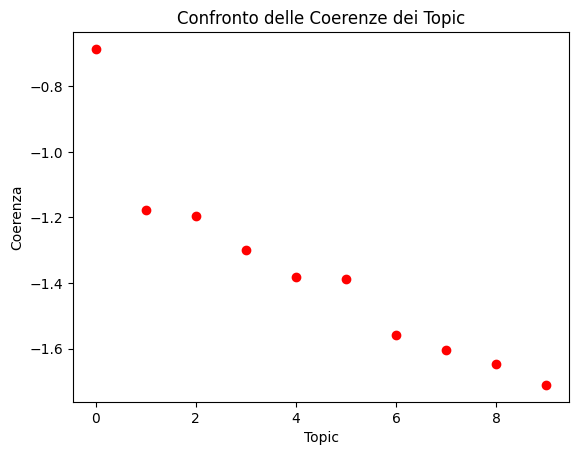

In [9]:
# Creazione del grafico a dispersione
topic_label = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8',
               'Topic 9', 'Topic 10']
coherence_scores = [topic[1] for topic in top_topics]

# Creazione del grafico a dispersione
plt.scatter(range(len(coherence_scores)), coherence_scores, color='r')
# Aggiunta delle etichette degli assi e del titolo del grafico
# plt.set_xticks(np.arange(0, len(coherence_scores)))
plt.xlabel('Topic')
plt.ylabel('Coerenza')
plt.title('Confronto delle Coerenze dei Topic')

# Visualizzazione del grafico
plt.show()